# steps FOllowed :-
 Basic sanity check. <br>
 Feature engineering  <br>
 handling columns which have more amount of categorical values <br>
  Outlier treatment with IQR <br>
 EDA wrt to target variable and other features such as sqft area etc <br>
 tried to figure out whats wrong in lalitpur data <br>
 Conclusion <br>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set()

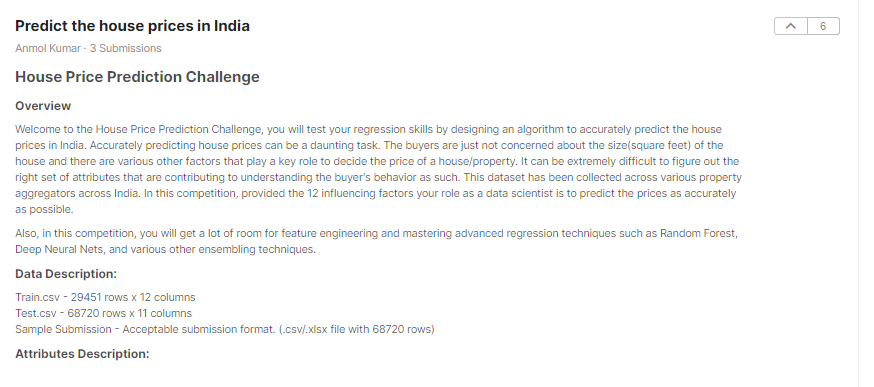

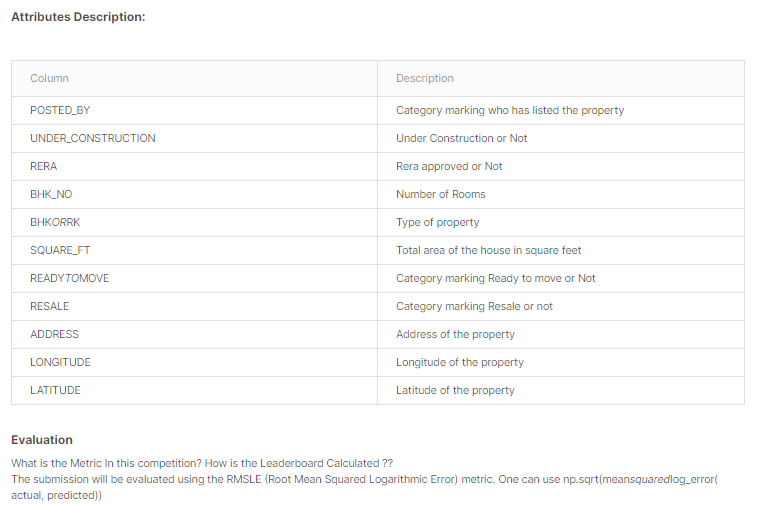

In [ ]:
df=pd.read_csv('../input/house-price-prediction-challenge/train.csv')


In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

#### If we see BHK_NO it has max value 20, which is not possible 
#### In price we can see 3000 lac which seem to be outlier

In [ ]:
# taking out city from address 

In [ ]:
df['CITY']=df['ADDRESS'].apply(lambda x :x.split(',')[1])

In [ ]:
df.drop('ADDRESS',1,inplace=True)

In [ ]:
df.head()

In [ ]:
df.isnull().sum(axis=0)

### lets see unique and value counts  in different columns

In [ ]:
df.nunique()

let's check value count of colums which have less than 20 value

In [ ]:
col_less_20=['POSTED_BY','UNDER_CONSTRUCTION','BHK_NO.','BHK_OR_RK','READY_TO_MOVE','RESALE','CITY']


for col in col_less_20:
    print(df[col].value_counts())
    print("----------------------------------------------")

In [ ]:
# we have so much city we can make less occuring city as Other and maharastra as other

In [ ]:
df['CITY'].value_counts()[:11]

In [ ]:
# we can keep top 10 and fo reaming wi will make other

In [ ]:
col_dict_city=dict(df['CITY'].value_counts()<600)

In [ ]:
for i in col_dict_city.keys():
    if col_dict_city[i]==True:
        df['CITY']=df['CITY'].replace(i,'Other')
# maharastra is not a city       
df['CITY']=df['CITY'].replace('Maharashtra','Other')

 we have also som many BHK we can make 5+ or 4+ bhk 

In [ ]:
df['BHK_NO.'].value_counts()

We can see after 4 bhk number are decreased have so many value we can do that make '4+'

In [ ]:
# converting dtype of BHK_NO to categorical

df['BHK_NO.']=df['BHK_NO.'].astype('O')

In [ ]:
col_dict_bhk=dict(df['BHK_NO.'].value_counts()<1000)

In [ ]:
for i in col_dict_bhk.keys():
    if col_dict_bhk[i]==True:
        df['BHK_NO.']=df['BHK_NO.'].replace(i,'4+')

In [ ]:
df['BHK_NO.'].value_counts()

In [ ]:
df['CITY'].value_counts()

In [ ]:
#dropping BHK or RK as highly skewness
df.drop('BHK_OR_RK',1,inplace=True)

In [ ]:
# with the help of sqft and price we can drive another feature price per sqft
df['Price_per_sqft(lac)']=df['TARGET(PRICE_IN_LACS)']/df['SQUARE_FT']

In [ ]:
df.nunique()

### We r good to go we for model building but before that let quickly do some EDA try to understand data

### EDA 

In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['TARGET(PRICE_IN_LACS)'])

plt.subplot(2,2,2)
sns.distplot(df['SQUARE_FT'])
plt.subplot(2,2,3)
sns.distplot(df['LONGITUDE'])
plt.subplot(2,2,4)
sns.distplot(df['LATITUDE'])

we can say that we have outliers in target and sq ft let check them and treat them

If we see longitude and latitude, in longitude we have 3 peak in 0-40 which , in latitude 50-100 which means we have major city in between these

In [ ]:
# With the help of interquantile technique and soft boundary so we don't tempored much data we removed outliers


cols = ['SQUARE_FT', 'TARGET(PRICE_IN_LACS)'] # one or more

Q1 = df[cols].quantile(0.05)
Q3 = df[cols].quantile(0.90)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['TARGET(PRICE_IN_LACS)'])

plt.subplot(2,2,2)
sns.distplot(df['SQUARE_FT'])
plt.subplot(2,2,3)
sns.distplot(df['LONGITUDE'])
plt.subplot(2,2,4)
sns.distplot(df['LATITUDE'])

Now we can see clear picture :
We have more house between prices between 10 100 lac
more houses between 1000 to 2000 sq ft

In [ ]:
# lets see outliers 

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='TARGET(PRICE_IN_LACS)',y='SQUARE_FT',hue='POSTED_BY',data=df)

We can say that dealer sell property most costlier then owner and builder <br>
becaouse if we see blue they are highly dense between 0-100 but decrease after that we can see only orange

If we see highly dense in price 0 to 100 then decrease <br>

and we don't have any outliers

In [ ]:
# let see house price wrt city

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='CITY',y='TARGET(PRICE_IN_LACS)',data=df,estimator=np.median)

we can see that in mumbai we need to pay more <br>
In second we have lalitpur but its so strange as lalitpur is not metro city or crowded city <br>

In [ ]:
plt.figure(figsize=(20,15))
sns.barplot(x='CITY',y='TARGET(PRICE_IN_LACS)',hue='BHK_NO.',data=df,estimator=np.median)

 OK, higher the number of bhk more price u need to pay


In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='CITY',y='SQUARE_FT',data=df,estimator=np.median)

In [ ]:
plt.figure(figsize=(20,15))
sns.barplot(x='CITY',y='SQUARE_FT',hue='BHK_NO.',data=df,estimator=np.median)

If we closely observe mumbai and other city like bangalore etc, we will see we need to pay high amount and we get less area. <br>
Kolkatta and noida is good place to invest as you will need to pay less in this city and you will get more area

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['CITY'],y=df['Price_per_sqft(lac)'],estimator=np.median)

So we can say that Mumbai has high land price and  which impact on size of land people buy.

<br > something wrong in lalitpur

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.barplot('READY_TO_MOVE','TARGET(PRICE_IN_LACS)',data=df,estimator=np.median)

plt.subplot(2,2,2)
sns.barplot('RERA','TARGET(PRICE_IN_LACS)',data=df,estimator=np.median)
plt.subplot(2,2,3)
sns.barplot('RESALE','TARGET(PRICE_IN_LACS)',data=df,estimator=np.median)
plt.subplot(2,2,4)
sns.barplot('UNDER_CONSTRUCTION','TARGET(PRICE_IN_LACS)',data=df,estimator=np.median)

In [ ]:
plt.figure(figsize=(10,10))
corr = df.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k = 1).astype(np.bool))
sns.heatmap(corr,vmin=-1,vmax=1,annot=True)

Ready to move are slighlly costlier then not ready to move <br>
RERA registred are costlier property <br>
Rsale property is cheaper but with not much margin <br>
Under construction company is cheaper<br>

# let's try to figure out whats wrong in lalitpur

In [ ]:
# we will try to compare with mumbai,bangalore

In [ ]:
df_lalit=df[df['CITY']=='Lalitpur']

In [ ]:
df_mumbai=df[df['CITY']=='Mumbai']

In [ ]:
df_bang=df[df['CITY']=='Bangalore']

In [ ]:
df_lalit.head()

In [ ]:
df_mumbai.head()

In [ ]:
df_bang.head()

In [ ]:
df_lalit.nunique()

In [ ]:
df_lalit.describe([.99])

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.distplot(df_lalit['TARGET(PRICE_IN_LACS)'],hist=False,color='r')
sns.distplot(df_mumbai['TARGET(PRICE_IN_LACS)'],hist=False,color='g')
sns.distplot(df_bang['TARGET(PRICE_IN_LACS)'],hist=False,color='b')

plt.subplot(2,1,2)
sns.distplot(df_lalit['SQUARE_FT'],hist=False,color='r')
sns.distplot(df_mumbai['SQUARE_FT'],hist=False,color='g')
sns.distplot(df_bang['SQUARE_FT'],hist=False,color='b')


Mumbai and lalitpur is showing almost same distribution,which is quite strnge, maybe data is not feasible for lalitpur or more analysis required

# Conclusion Of analysis:-

Dealer sell property most costlier then owner and builder <br>

IN major place we will see property price in between  10-100. <br>

Mumbai is most costlier city wrt price, land price per sqft <br> 

price increase with BHK <br>

Ready to move are slighlly costlier then not ready to move <br>

RERA registred are costlier property <br>

Rsale property is cheaper but with not much margin <br>

Under construction company is cheaper<br>


# If you liked my work Upvote
### If you find something wrong, comment below
### connect me on :- www.linkedin.com/in/arvindpatel2512

